# Ch `04`: Concept `04` 

## Softmax classification

Import the usual libraries:

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Generated some initial 2D data:

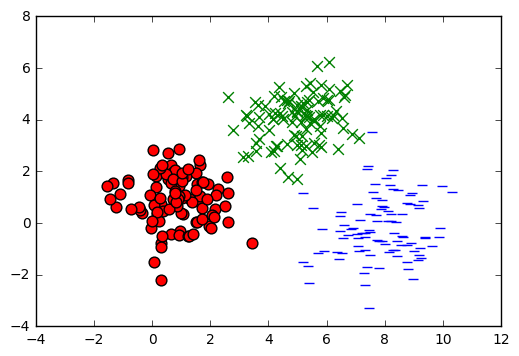

In [2]:
learning_rate = 0.01
training_epochs = 1000
num_labels = 3
batch_size = 100

x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))

plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()

Define the labels and shuffle the data:

In [3]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))

xs = np.vstack((xs_label0, xs_label1, xs_label2))
labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))

arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

We'll get back to this later, but the following are test inputs that we'll use to evaluate the model:

In [4]:
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))

test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10)

Again, define the placeholders, variables, model, and cost function:

In [5]:
train_size, num_features = xs.shape

X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])

W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)

cost = -tf.reduce_sum(Y * tf.log(y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Train the softmax classification model:

In [7]:
with tf.Session() as sess:
    tf.initialize_all_variables().run()

    for step in xrange(training_epochs * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset + batch_size), :]
        batch_labels = labels[offset:(offset + batch_size)]
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
        if step % 100 == 0:
            print (step, err)

    W_val = sess.run(W)
    print('w', W_val)
    b_val = sess.run(b)
    print('b', b_val)
    print "accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels})

(0, 109.8612)
(100, 8.4266253)
(200, 4.1666403)
(300, 2.5741928)
(400, 5.6903338)
(500, 2.9353881)
(600, 1.6648874)
(700, 4.9623308)
(800, 2.4428787)
(900, 1.2617326)
(1000, 4.5366726)
(1100, 2.1555078)
(1200, 1.0235859)
(1300, 4.2308006)
(1400, 1.9637032)
(1500, 0.86320722)
(1600, 3.9904327)
(1700, 1.8258355)
(1800, 0.74666834)
(1900, 3.7922473)
(2000, 1.7217202)
(2100, 0.65765113)
(2200, 3.6239059)
(2300, 1.640166)
(2400, 0.58721226)
(2500, 3.4779611)
(2600, 1.574424)
(2700, 0.52998352)
(2800, 3.3495052)
(2900, 1.5201629)
('w', array([[-2.39018393,  0.14575171,  2.2444303 ],
       [-0.73883575,  2.14113855, -1.40230107]], dtype=float32))
('b', array([ 10.65149117,  -2.70550704,  -7.9459877 ], dtype=float32))
accuracy 1.0
